In [12]:
%load_ext autoreload

%autoreload 2
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.svm import SVC
 
from sklearn import metrics

from mlxtend.plotting import plot_decision_regions
from sklearn import preprocessing, metrics
from sklearn.linear_model import LogisticRegression

import warnings
import numpy as np
from collections import OrderedDict

from lob_data_utils import lob, db_result, model
from lob_data_utils import roc_results, gdf_pca, stocks_numbers
from lob_data_utils.svm_calculation import lob_svm


sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
data_length = 24000
stocks = stocks_numbers.chosen_stocks
should_save_fig = False

In [14]:
df_scores = pd.read_csv('../gdf_pca/res_null_hypothesis_balanced.csv')
df_scores = df_scores[df_scores['stock'].isin(stocks)]

In [15]:
df_scores

,Unnamed: 0,f1,kappa,kernel,matthews,precision,recall,roc_auc,stock,test_f1,...,train_matthews,train_precision,train_recall,train_roc_auc,train_val_f1,train_val_kappa,train_val_matthews,train_val_precision,train_val_recall,train_val_roc_auc
0,9058,0.549415,0.082003,fake,0.082229,0.533317,0.567274,0.541029,9058,0.577058,...,0.077707,0.536006,0.547861,0.538848,0.542174,0.078757,0.07893,0.531413,0.554034,0.539428
1,9058,0.549415,0.082003,fake,0.082229,0.533317,0.567274,0.541029,9058,0.577058,...,0.077707,0.536006,0.547861,0.538848,0.542174,0.078757,0.07893,0.531413,0.554034,0.539428
2,9058,0.549415,0.082003,fake,0.082229,0.533317,0.567274,0.541029,9058,0.577058,...,0.077707,0.536006,0.547861,0.538848,0.542174,0.078757,0.07893,0.531413,0.554034,0.539428
3,9058,0.549415,0.082003,fake,0.082229,0.533317,0.567274,0.541029,9058,0.577058,...,0.077707,0.536006,0.547861,0.538848,0.542174,0.078757,0.07893,0.531413,0.554034,0.539428
4,9058,0.549415,0.082003,fake,0.082229,0.533317,0.567274,0.541029,9058,0.577058,...,0.077707,0.536006,0.547861,0.538848,0.542174,0.078757,0.07893,0.531413,0.554034,0.539428
5,9058,0.549415,0.082003,fake,0.082229,0.533317,0.567274,0.541029,9058,0.577058,...,0.077707,0.536006,0.547861,0.538848,0.542174,0.078757,0.07893,0.531413,0.554034,0.539428
6,9058,0.549415,0.082003,fake,0.082229,0.533317,0.567274,0.541029,9058,0.577058,...,0.077707,0.536006,0.547861,0.538848,0.542174,0.078757,0.07893,0.531413,0.554034,0.539428
7,9058,0.549415,0.082003,fake,0.082229,0.533317,0.567274,0.541029,9058,0.577058,...,0.077707,0.536006,0.547861,0.538848,0.542174,0.078757,0.07893,0.531413,0.554034,0.539428
8,9058,0.549415,0.082003,fake,0.082229,0.533317,0.567274,0.541029,9058,0.577058,...,0.077707,0.536006,0.547861,0.538848,0.542174,0.078757,0.07893,0.531413,0.554034,0.539428
9,9058,0.549415,0.082003,fake,0.082229,0.533317,0.567274,0.541029,9058,0.577058,...,0.077707,0.536006,0.547861,0.538848,0.542174,0.078757,0.07893,0.531413,0.554034,0.539428


,test_matthews,matthews,test_roc_auc,roc_auc
count,15.000000,15.000000,1.500000e+01,1.500000e+01
mean,0.134481,0.082229,5.671892e-01,5.410286e-01
std,0.000000,0.000000,2.298380e-16,1.149190e-16
min,0.134481,0.082229,5.671892e-01,5.410286e-01
25%,0.134481,0.082229,5.671892e-01,5.410286e-01
50%,0.134481,0.082229,5.671892e-01,5.410286e-01
75%,0.134481,0.082229,5.671892e-01,5.410286e-01
max,0.134481,0.082229,5.671892e-01,5.410286e-01


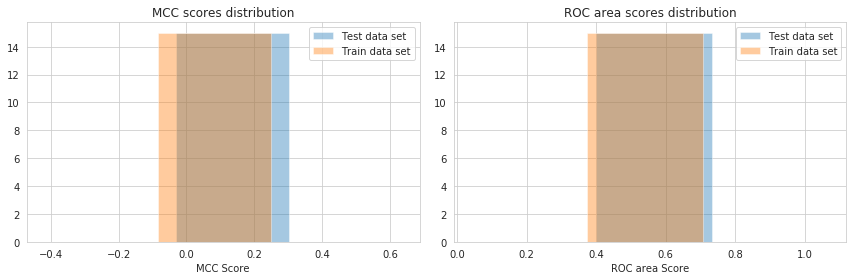

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.distplot(df_scores['test_matthews'], kde=False, label='Test data set', ax=ax1)
sns.distplot(df_scores['matthews'], kde=False, label='Train data set', ax=ax1)

ax1.legend()
ax1.set_xlabel('MCC Score')
ax1.set_title('MCC scores distribution')

sns.distplot(df_scores['test_roc_auc'], kde=False, label='Test data set', ax=ax2)
sns.distplot(df_scores['roc_auc'], kde=False, label='Train data set', ax=ax2)

ax2.legend()
ax2.set_xlabel('ROC area Score')
ax2.set_title('ROC area scores distribution')
plt.tight_layout()
#plt.savefig('results_log_que_score_dist.png')

df_scores[['test_matthews', 'matthews', 'test_roc_auc', 'roc_auc']].describe()

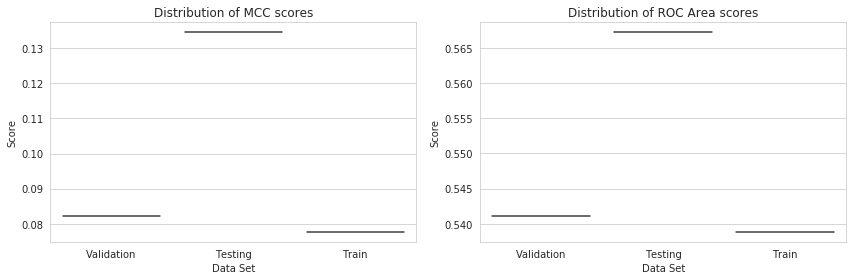

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

columns = ['stock', 'matthews', 'roc_auc', 
           'test_matthews', 'test_roc_auc', 'train_matthews', 'train_roc_auc']

df = df_scores[columns].copy()
df.rename(columns={'matthews': 'Validation', 'test_matthews': 'Testing', 'train_matthews': 'Train'}, inplace=True)
df = df.melt(['stock', 'roc_auc', 'test_roc_auc', 'train_roc_auc'])
sns.violinplot(x="variable", y="value", data=df, ax=ax1)
ax1.set_title('Distribution of MCC scores')

ax1.set_xlabel('Data Set')
ax1.set_ylabel('Score')

df = df_scores[columns].copy()
df.rename(columns={'roc_auc': 'Validation', 'test_roc_auc': 'Testing', 'train_roc_auc': 'Train'}, inplace=True)
df = df.melt(['stock', 'matthews', 'test_matthews', 'train_matthews'])

ax2.set_title('Distribution of ROC Area scores')

sns.violinplot(x="variable", y="value", data=df, ax=ax2)
ax2.set_xlabel('Data Set')
ax2.set_ylabel('Score')

plt.tight_layout()
plt.savefig('violin_distribution_scores_log_que.png')

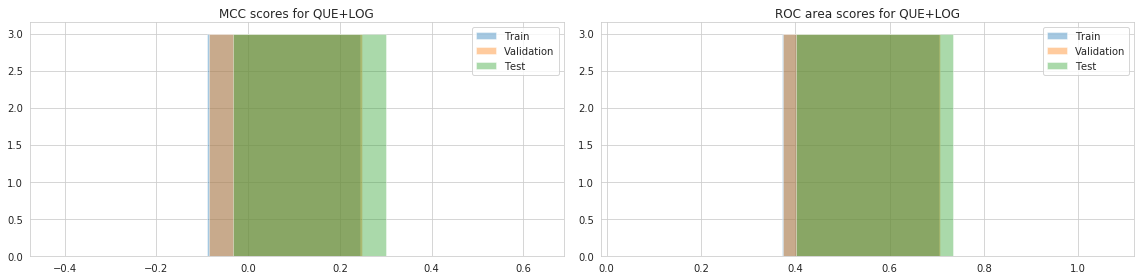

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

sns.distplot(df_scores[['train_matthews']], label='Train', ax=ax1)
sns.distplot(df_scores[['matthews']], label='Validation', ax=ax1)
sns.distplot(df_scores[['test_matthews']], label='Test', ax=ax1)
ax1.legend()
ax1.set_title('MCC scores for QUE+LOG')

sns.distplot(df_scores[['train_roc_auc']], label='Train', ax=ax2)
sns.distplot(df_scores[['roc_auc']], label='Validation', ax=ax2)
sns.distplot(df_scores[['test_roc_auc']], label='Test', ax=ax2)
ax2.legend()
ax2.set_title('ROC area scores for QUE+LOG')
plt.tight_layout()
if should_save_fig:
    plt.savefig('results_que_log.png')

In [19]:
print(df_scores[['train_matthews', 'matthews', 'test_matthews', 
        'train_roc_auc', 'roc_auc', 'test_roc_auc']].describe().to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &  train\_matthews &   matthews &  test\_matthews &  train\_roc\_auc &       roc\_auc &  test\_roc\_auc \\
\midrule
count &    1.500000e+01 &  15.000000 &      15.000000 &   1.500000e+01 &  1.500000e+01 &  1.500000e+01 \\
mean  &    7.770685e-02 &   0.082229 &       0.134481 &   5.388477e-01 &  5.410286e-01 &  5.671892e-01 \\
std   &    1.436488e-17 &   0.000000 &       0.000000 &   1.149190e-16 &  1.149190e-16 &  2.298380e-16 \\
min   &    7.770685e-02 &   0.082229 &       0.134481 &   5.388477e-01 &  5.410286e-01 &  5.671892e-01 \\
25\%   &    7.770685e-02 &   0.082229 &       0.134481 &   5.388477e-01 &  5.410286e-01 &  5.671892e-01 \\
50\%   &    7.770685e-02 &   0.082229 &       0.134481 &   5.388477e-01 &  5.410286e-01 &  5.671892e-01 \\
75\%   &    7.770685e-02 &   0.082229 &       0.134481 &   5.388477e-01 &  5.410286e-01 &  5.671892e-01 \\
max   &    7.770685e-02 &   0.082229 &       0.134481 &   5.388477e-01 &  5.410286e-01 &  5.671892e-01

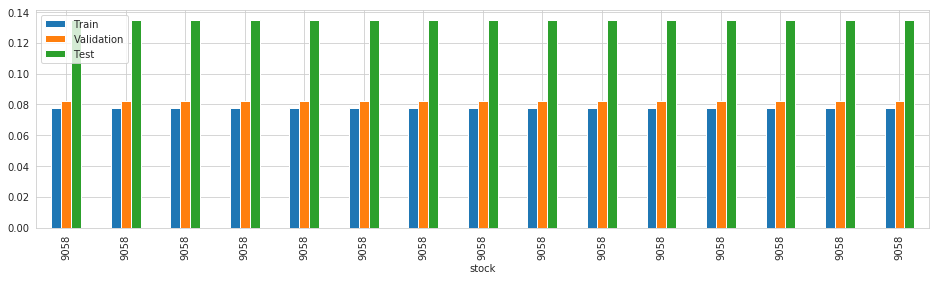

In [20]:
df_scores.index = df_scores['stock']
df_scores[['train_matthews', 'matthews', 'test_matthews']].plot(kind='bar', figsize=(16, 4))
plt.legend(['Train', 'Validation', 'Test'])

In [21]:
df_scores

,Unnamed: 0,f1,kappa,kernel,matthews,precision,recall,roc_auc,stock,test_f1,...,train_matthews,train_precision,train_recall,train_roc_auc,train_val_f1,train_val_kappa,train_val_matthews,train_val_precision,train_val_recall,train_val_roc_auc
stock,,,,,,,,,,,,,,,,,,,,,
9058,9058,0.549415,0.082003,fake,0.082229,0.533317,0.567274,0.541029,9058,0.577058,...,0.077707,0.536006,0.547861,0.538848,0.542174,0.078757,0.07893,0.531413,0.554034,0.539428
9058,9058,0.549415,0.082003,fake,0.082229,0.533317,0.567274,0.541029,9058,0.577058,...,0.077707,0.536006,0.547861,0.538848,0.542174,0.078757,0.07893,0.531413,0.554034,0.539428
9058,9058,0.549415,0.082003,fake,0.082229,0.533317,0.567274,0.541029,9058,0.577058,...,0.077707,0.536006,0.547861,0.538848,0.542174,0.078757,0.07893,0.531413,0.554034,0.539428
9058,9058,0.549415,0.082003,fake,0.082229,0.533317,0.567274,0.541029,9058,0.577058,...,0.077707,0.536006,0.547861,0.538848,0.542174,0.078757,0.07893,0.531413,0.554034,0.539428
9058,9058,0.549415,0.082003,fake,0.082229,0.533317,0.567274,0.541029,9058,0.577058,...,0.077707,0.536006,0.547861,0.538848,0.542174,0.078757,0.07893,0.531413,0.554034,0.539428
9058,9058,0.549415,0.082003,fake,0.082229,0.533317,0.567274,0.541029,9058,0.577058,...,0.077707,0.536006,0.547861,0.538848,0.542174,0.078757,0.07893,0.531413,0.554034,0.539428
9058,9058,0.549415,0.082003,fake,0.082229,0.533317,0.567274,0.541029,9058,0.577058,...,0.077707,0.536006,0.547861,0.538848,0.542174,0.078757,0.07893,0.531413,0.554034,0.539428
9058,9058,0.549415,0.082003,fake,0.082229,0.533317,0.567274,0.541029,9058,0.577058,...,0.077707,0.536006,0.547861,0.538848,0.542174,0.078757,0.07893,0.531413,0.554034,0.539428
9058,9058,0.549415,0.082003,fake,0.082229,0.533317,0.567274,0.541029,9058,0.577058,...,0.077707,0.536006,0.547861,0.538848,0.542174,0.078757,0.07893,0.531413,0.554034,0.539428
